# Material Flow Analysis 

In [1]:
import requests
import json
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
## Data
# Import Demo data
df_demo = pd.read_csv("C:/Users/vette/Dropbox/Tu/Studie/Master/2018-2019/Master Thesis/Phase 1/Data/demo/demo_combined.csv",sep=",",encoding='Utf-8',index_col=0)

# Import Waste data
df_waste = pd.read_csv("C:/Users/vette/Dropbox/Tu/Studie/Master/2018-2019/Master Thesis/Phase 1/Data/Final_clean_V3_0.csv",sep=",",encoding='Utf-8',index_col=0)

# Import Area Data
df_wijken = pd.read_csv("C:/Users/vette/Dropbox/Tu/Studie/Master/2018-2019/Master Thesis/Phase 1/Data/wijken.csv",sep=";",encoding='Utf-8',index_col=0)

# Import Afstanden wijken
wijken_afstand = pd.read_csv("C:/Users/vette/Dropbox/Tu/Studie/Master/2018-2019/Master Thesis/Phase 1/Data/wijken_Afstand.csv",sep=";",encoding='Utf-8',index_col=0)
wijken_afstand = wijken_afstand.fillna(0)

## Data Preperation

The different flows of the material flow analysis are converted into the right dataframe format. Each stock and flow of the analysis is represented by a data frame containing data of waste production on a "wijk" level for every month. 

In [3]:
## data frames
Discarded_Rest = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Discarded_Plastic = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Separaded_Plastic = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Second_Separaded_Plastic = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Discarded_GFT = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Separaded_GFT = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Non_Separaded = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Plastic_Co2_Transport_Non = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Plastic_Co2_Transport_Sep = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Plastic_Co2_Transport_Non_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Plastic_Co2_Transport_Sep_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

GFT_Co2_Transport_Non = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
GFT_Co2_Transport_Sep = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
GFT_Co2_Transport_Non_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
GFT_Co2_Transport_Sep_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Plastic_Co2_Sep = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Plastic_Co2_Sep_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

GFT_Co2_Fer = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
GFT_Co2_Fer_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Plastic_Co2_Inc = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Plastic_Co2_Inc_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

GFT_Co2_Inc = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
GFT_Co2_Inc_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Plastic_Co2_Rep = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Plastic_Co2_Rep_All = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Plastic_Reproduction = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Paper_Reproduction = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

Plastic_Heat = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
Plastic_Electricity = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

GFT_Heat_Inc = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
GFT_Electricity_Inc = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)

GFT_Heat_Fer = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)
GFT_Electricity_Fer = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12'],index=df_wijken.index)



In [4]:
# Waste data from April 2018 to March 2019

Rest = df_waste[(df_waste.fractie == "Rest") & ((df_waste.year == (2018)) | (df_waste.year == (2019))) ]
Rest = Rest.drop(Rest[(Rest.year == 2018) & ((Rest.month == 1) | (Rest.month == 2) |(Rest.month == 3)|(Rest.month == 4))].index,axis=0)
Rest = Rest.drop(Rest[(Rest.year == 2019) & ((Rest.month == 5))].index,axis=0)
Rest = Rest.groupby(['wijk','month'])["net_weight"].sum()
Rest = Rest.reset_index(level=['wijk','month'])
Rest = Rest.rename(index=str, columns={"net_weight": "Rest"})

Plastic = df_waste[(df_waste.fractie == "Plastic") & ((df_waste.year == (2018)) | (df_waste.year == (2019))) ]
Plastic = Plastic.drop(Plastic[(Plastic.year == 2018) & ((Plastic.month == 1) | (Plastic.month == 2) |(Plastic.month == 3)|(Plastic.month == 4))].index,axis=0)
Plastic = Plastic.drop(Plastic[(Plastic.year == 2019) & ((Plastic.month == 5))].index,axis=0)
Plastic = Plastic.groupby(['wijk','month'])["net_weight"].sum()
Plastic = Plastic.reset_index(level=['wijk','month'])
Plastic = Plastic.rename(index=str, columns={"net_weight": "Plastic"})


GFT = df_waste[(df_waste.fractie == "GFT") & ((df_waste.year == (2018)) | (df_waste.year == (2019))) ]
GFT = GFT.drop(GFT[(GFT.year == 2018) & ((GFT.month == 1) | (GFT.month == 2) |(GFT.month == 3))].index,axis=0)
GFT = GFT.groupby(['wijk','month'])["net_weight"].sum()
GFT = GFT.reset_index(level=['wijk','month'])
GFT = GFT.rename(index=str, columns={"net_weight": "GFT"})



In [5]:
# Seperaded _Plastic Data

for i in range(1,13):
    waste = Rest[["wijk","Rest"]][Rest.month == i]
    waste = waste.set_index('wijk')
    Discarded_Rest[str(i)] = waste

Discarded_Rest = Discarded_Rest.fillna(0)
Discarded_Rest = Discarded_Rest/1000

In [6]:
# Seperaded _Plastic Data

for i in range(1,13):
    waste = Plastic[["wijk","Plastic"]][Plastic.month == i]
    waste = waste.set_index('wijk')
    Separaded_Plastic[str(i)] = waste

Separaded_Plastic = Separaded_Plastic.fillna(0)
Separaded_Plastic = Separaded_Plastic/1000
Separaded_Plastic = Separaded_Plastic.drop(Separaded_Plastic.iloc[[0,1,10,11,22,31,35,36,46,71,76,81,88,89,90,91,92]].index)

In [7]:
# Seperaded _GFT Data

for i in range(1,13):
    waste = GFT[["wijk","GFT"]][GFT.month == i]
    waste = waste.set_index('wijk')
    Separaded_GFT[str(i)] = waste

Separaded_GFT = Separaded_GFT.fillna(0)
Separaded_GFT = Separaded_GFT /1000
Separaded_GFT = Separaded_GFT.drop(Separaded_GFT.iloc[[0,1,10,11,22,31,35,36,46,71,76,81,88,89,90,91,92]].index)

In [8]:
# Non_Seperated_Plastic data

for i in range(1,13):
    waste = Rest[["wijk","Rest"]][Rest.month == i]
    waste = waste.set_index('wijk')
    Non_Separaded[str(i)] = waste

Non_Separaded = Non_Separaded.fillna(0)
Non_Separaded = Non_Separaded/1000
Non_Separaded = Non_Separaded.drop(Non_Separaded.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,22,31,35,36,46,47,48,49,51,52,53,54,55,71,76,81,88,89,90,91,92,93,94,95,96,97,98]].index)

In [9]:
## list of districts ordered by suburbs

center = ['A02','A03','A04','A05','A06','A07','A08','A09']
north = ['N61','N62','N63','N64','N65','N66','N67','N68','N69','N70','N71','N72','N73','N74']
west = ['E13','E14','E15','E16','E17','E18','E19','E20','E21','E22','E36','E37','E38','E39','E40','E41','E42','E43','E75']
new_west = ['F76','F77','F78','F79','F80','F81','F82','F83','F84','F85','F86','F87','F88','F89']
south = ['K23','K24','K25','K26','K44','K45','K46','K47','K48','K49','K52','K53','K54','K59','K90','K91']
east = ['M27','M28','M29','M30','M31','M32','M33','M34','M35','M50','M51','M55','M56','M57','M58']
bijlmer = ['T93','T94','T95','T96','T97','T98']


## Plastic

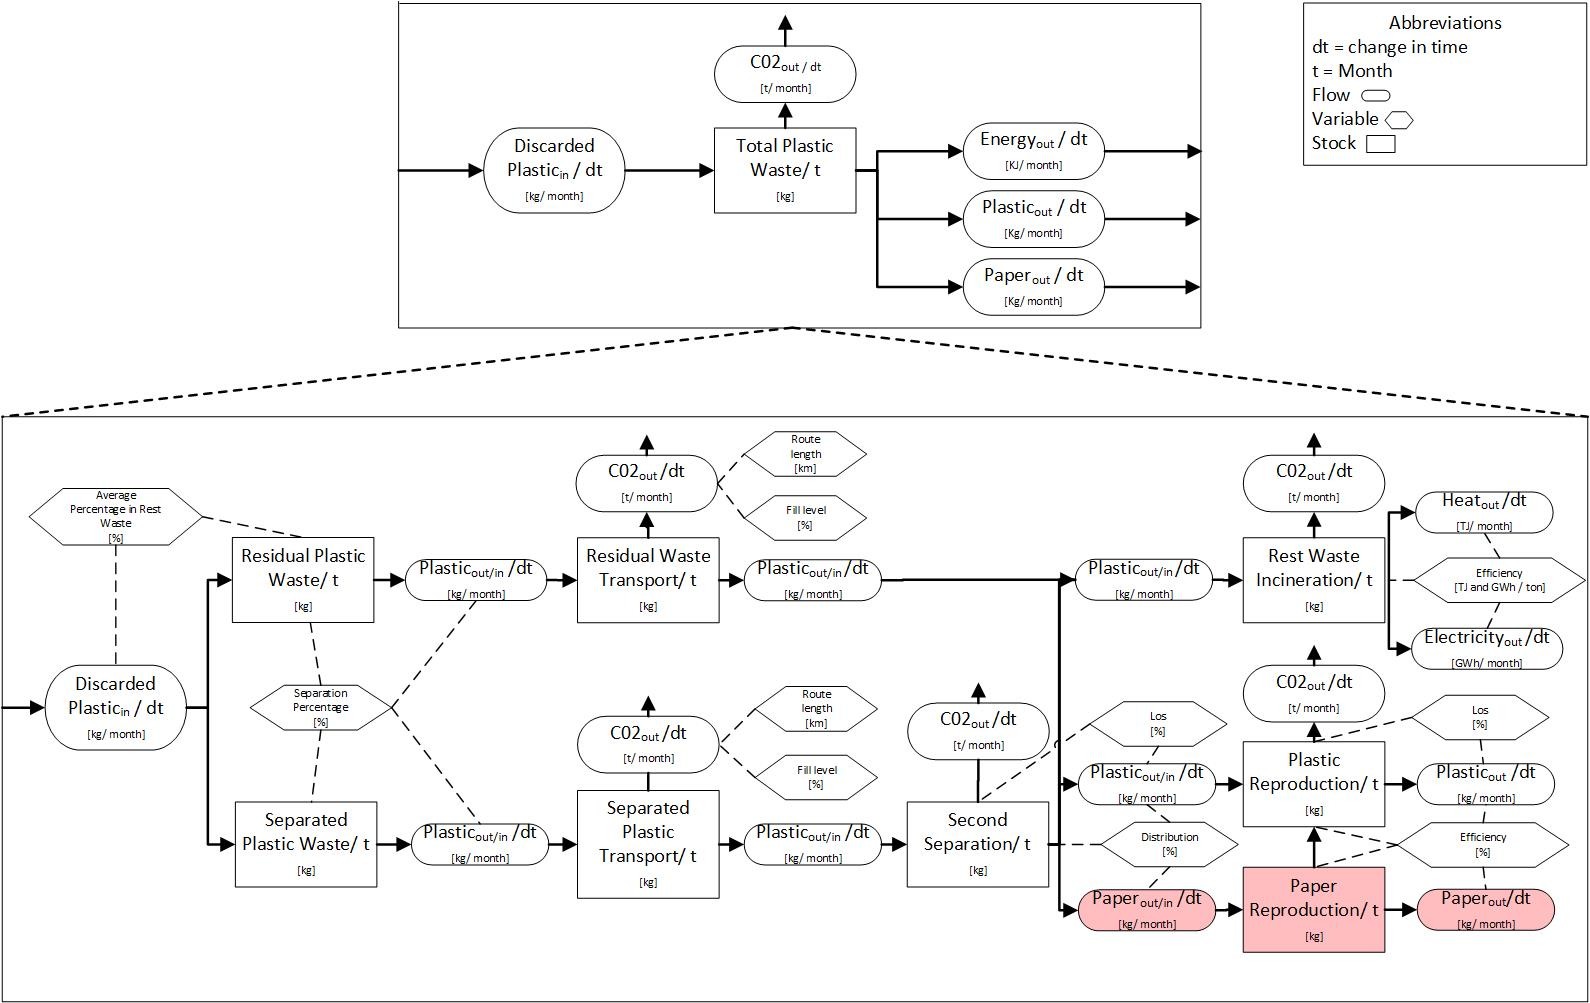

### Disposed Plastic

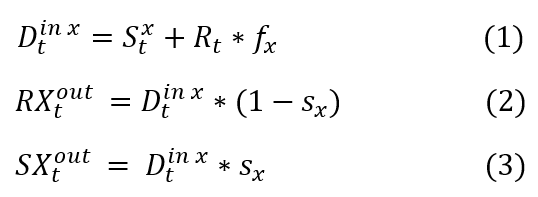

x = plastic<br>
t = month<br>
fx = non-separated plastic waste % 1.2 drinkpackaging and 6.4 Plastic packaging 7.6% total in residual waste<br>

(1) Inflow of total discared plastic waste combination of non-separaded and separaded plastic.<br>
(2) Outflow fo non-separaded plastic<br>
(3) Outflow of separaded plastic <br>





In [10]:
## Total discarded plastic 
Discarded_Plastic = Separaded_Plastic + Non_Separaded * 0.076

## Non-separaded plastic
Non_Separaded_Plastic = Non_Separaded * 0.076


In [484]:
traces = []

Non_Separaded_Plastic_Selection = Non_Separaded_Plastic[Non_Separaded_Plastic.index.isin(east)]
Converted_Non_Separated = Non_Separaded_Plastic_Selection.T
Converted_Non_Separated['mean'] =Non_Separaded_Plastic_Selection.mean()
Discard_Viso  =Converted_Non_Separated

Quarters = Non_Separaded_Plastic_Selection.index
for i in Quarters:
    trace = go.Scatter(
        mode='lines+markers',
        x=Discard_Viso.index,
        y=Discard_Viso[i],
        name=i,
        hoverinfo='name',
    )
    traces.append(trace)
trace = go.Scatter(
        mode='lines+markers',
        x=Converted_Non_Separated.iloc[:,-1].index,
        y=Converted_Non_Separated.iloc[:,-1],
        name='Mean',
        hoverinfo='name',
        line = dict(
        color = ('rgb(254, 27, 7)'),
        width = 6)
)
traces.append(trace)
layout = dict(
    title= 'Non-Separated Plastic - North',
    barmode='stack',
    xaxis1=dict(
      title='Month'
     ),
    yaxis1=dict(
      title='ton Plastic'
     ),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [515]:
traces = []

Separaded_Plastic_Selection = Separaded_Plastic[Separaded_Plastic.index.isin(bijlmer)]
Converted_Separated = Separaded_Plastic_Selection.T
Converted_Separated['mean'] =Separaded_Plastic_Selection.mean()

Discard_Viso = Converted_Separated

Quarters = Separaded_Plastic_Selection.index
for i in Quarters:
    trace = go.Scatter(
        mode='lines+markers',
        x=Discard_Viso.index,
        y=Discard_Viso[i],
        name=i,
        hoverinfo='name',
    )
    traces.append(trace)
trace = go.Scatter(
        mode='lines+markers',
        x=Converted_Separated.iloc[:,-1].index,
        y=Converted_Separated.iloc[:,-1],
        name='Mean',
        hoverinfo='name',
        line = dict(
        color = ('rgb(254, 27, 7)'),
        width = 6)
)
traces.append(trace)
layout = dict(
    title= 'Separated Plastic - Centre',
    barmode='stack',
    xaxis1=dict(
      title='Month'
     ),
    yaxis1=dict(
      title='ton Plastic'
     ),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## CO2 Transport

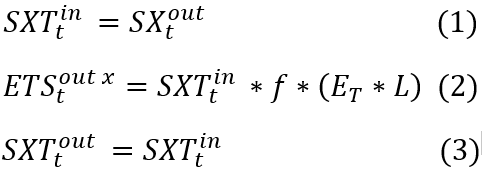

f = avarage fill level of containers and trucks 15 % <br>
L = loading capacity of trucks 11.288 t<br>
ET = 0.258 kg CO2 per ton and km <br>


In [11]:
## Plastic
for i in range(0,12):
    Plastic_Co2_Transport_Sep.iloc[:,i]= wijken_afstand.Afstand_Plastic*((Separaded_Plastic.iloc[:,i]) / (10*0.15)) *0.000258

for i in range(0,12):
    Plastic_Co2_Transport_Sep_All.iloc[:,i]= wijken_afstand.Afstand_Plastic*((Discarded_Plastic.iloc[:,i]) / (10*0.15)) *0.000258


In [12]:
for i in range(0,12):
    Plastic_Co2_Transport_Non.iloc[:,i] = wijken_afstand.Afstand_Plastic*((Non_Separaded_Plastic.iloc[:,i]) / (10*0.15)) *0.000258

for i in range(0,12):
    Plastic_Co2_Transport_Non_All.iloc[:,i] = wijken_afstand.Afstand_Plastic*((Discarded_Plastic.iloc[:,i]) / (10*0.15)) *0.000258    


In [13]:
C02_trans_non = Plastic_Co2_Transport_Non.T
C02_trans_sep = Plastic_Co2_Transport_Sep.T
Plastic_CO2_Tansport_Total  = C02_trans_non.sum(axis = 0, skipna = True) + C02_trans_sep.sum(axis = 0, skipna = True) 


In [12]:
traces = []

trace1 = go.Bar(
    x=Plastic_CO2_Tansport_Total.index,
    y=Plastic_CO2_Tansport_Total,
    name="Wijk",
    hoverinfo='name',
)
traces.append(trace1)
layout = dict(
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

PlotlyRequestError: No message

## CO2 Separation

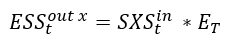
0.028 t CO 2 per ton Waste

In [14]:
Plastic_Co2_Sep = Separaded_Plastic * 0.028

Plastic_Co2_Sep_All = Discarded_Plastic * 0.028

In [15]:
Plastic_Co2_Sep_Viso = Plastic_Co2_Sep.sum(axis = 1, skipna = True)

In [15]:
traces = []

trace1 = go.Bar(
    x=Plastic_Co2_Sep_Viso.index,
    y=Plastic_Co2_Sep_Viso,
    name="Wijk",
    hoverinfo='name',
)
traces.append(trace1)
layout = dict(
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

PlotlyRequestError: No message

## CO2 Incineration

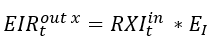
3 t CO 2 per ton Waste

In [16]:
Plastic_Co2_Inc = Non_Separaded_Plastic * 3

Plastic_Co2_Inc_All = Discarded_Plastic * 3

In [17]:
Plastic_Co2_Inc_Viso = Plastic_Co2_Inc.sum(axis = 1, skipna = True)

In [18]:
traces = []

trace1 = go.Bar(
    x=Plastic_Co2_Inc_Viso.index,
    y=Plastic_Co2_Inc_Viso,
    name="Wijk",
    hoverinfo='name',
)
traces.append(trace1)
layout = dict(
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

PlotlyRequestError: No message

## Plastic After Second Seperation

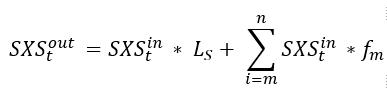
75 % of plastic is brought to Reproduciton Facility <br>
5% is lost due to low quality and incinerated<br>

In [18]:
Second_Separaded_Plastic = Separaded_Plastic*0.95*0.75

## Plastic Reproduction

Formula TBT
11 % of plastic is lost in reproduciton facility<br>

In [19]:
Plastic_Reproduction = Second_Separaded_Plastic * 0.89

## CO2 Reproduction

Formula TBT
1.5 t CO 2 per ton Afval<br>

In [20]:
Plastic_Co2_Rep = Second_Separaded_Plastic * (-1.5)

In [21]:
Plastic_Co2_Rep_All = Discarded_Plastic * (-1.5)

## Energy Incineration

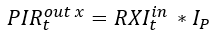
10.1 GJ per t waste <br>
26% electricity<br>
2% heat<br>
GJ to Mwh = 0.277<br>


In [22]:
Plastic_Heat = Non_Separaded_Plastic * 10.1 *0.02 * 0.277
Plastic_Electricity = Non_Separaded_Plastic * 10.1 *0.26 * 0.277

## Outputs Plastic Supply Chain

In [23]:
## CO2 Transport Non-Separated plastic
Co2_Transport_Non = Plastic_Co2_Transport_Non
Co2_Transport_Non = Co2_Transport_Non.sum(axis = 1, skipna = True)
Co2_Transport_Non = Co2_Transport_Non.sum(axis = 0, skipna = True)

Co2_Transport_Non_All = Plastic_Co2_Transport_Non_All
Co2_Transport_Non_All = Co2_Transport_Non_All.sum(axis = 1, skipna = True)
Co2_Transport_Non_All = Co2_Transport_Non_All.sum(axis = 0, skipna = True)

## CO2 inceneration
Co2_Inc = Plastic_Co2_Inc.sum(axis = 1, skipna = True)
Co2_Inc = Co2_Inc.sum(axis = 0, skipna = True)

Co2_Inc_All = Plastic_Co2_Inc_All.sum(axis = 1, skipna = True)
Co2_Inc_All = Co2_Inc_All.sum(axis = 0, skipna = True)

## Co2 Transport Separated plastic
Co2_Transport_Sep = Plastic_Co2_Transport_Sep.sum(axis = 1, skipna = True)
Co2_Transport_Sep = Co2_Transport_Sep.sum(axis = 0, skipna = True)

Co2_Transport_Sep_All = Plastic_Co2_Transport_Sep_All.sum(axis = 1, skipna = True)
Co2_Transport_Sep_All = Co2_Transport_Sep_All.sum(axis = 0, skipna = True)

## CO2 Second Seperation process
Co2_Sep = Plastic_Co2_Sep.sum(axis = 1, skipna = True)
Co2_Sep = Co2_Sep.sum(axis = 0, skipna = True)

Co2_Sep_All  = Plastic_Co2_Sep_All.sum(axis = 1, skipna = True)
Co2_Sep_All  = Co2_Sep_All.sum(axis = 0, skipna = True)

## CO2 Reproduction
Co2_Rep = Plastic_Co2_Rep.sum(axis = 1, skipna = True)
Co2_Rep = Co2_Rep.sum(axis = 0, skipna = True)

Co2_Rep_All = Plastic_Co2_Rep_All.sum(axis = 1, skipna = True)
Co2_Rep_All = Co2_Rep_All.sum(axis = 0, skipna = True)

In [24]:
## Reproduced Plastic 
Plastic_Rep = Plastic_Reproduction.sum(axis = 1, skipna = True)
Plastic_Rep = Plastic_Rep.sum(axis = 0, skipna = True)

## Generaded Heat and Electricity form Plastic 
Plastic_H = Plastic_Heat.sum(axis = 1, skipna = True)
Plastic_H = Plastic_H.sum(axis = 0, skipna = True)
Plastic_E = Plastic_Electricity.sum(axis = 1, skipna = True)
Plastic_E = Plastic_E.sum(axis = 0, skipna = True) 

In [298]:
traces = []

trace = go.Bar(
    x=["Heat","Electricity"],
    y=[Plastic_H,Plastic_E],
    name="MwH",
    xaxis= 'x1',
    yaxis= 'y1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)



trace1 = go.Bar(
    x=["Plastic"],
    y=[Plastic_Rep],
    name="Ton",
    xaxis= 'x2',
    yaxis= 'y2',
    hoverinfo='name',
)
traces.append(trace1)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)

layout = dict(
    title= 'Plastic - Energy and Material Recovery',
    barmode='stack',
    xaxis1=dict(
      domain= [0, 0.66],
      anchor= 'x1', 
      title='Recovered Energy'
     ),
    xaxis2=dict(
      domain= [0.66, 1.0],
      anchor= 'x2', 
      title= 'Recovered Material'
    ),
    yaxis1=dict(
        title='Mwh energy'
    ),
    yaxis2=dict(
        title='ton plastic',
        overlaying='y2',
        side='right'
    ),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [321]:
traces = []

trace = go.Bar(
    x=["Transport Non-Separated","Incineration"],
    y=[Co2_Transport_Non,Co2_Inc],
    name="Ton Co2",
    xaxis= 'x1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)



trace1 = go.Bar(
    x=["Transport Separated","Second Separation","Reproduction"],
    y=[Co2_Transport_Sep,Co2_Sep,Co2_Rep],
    name="Ton Co2",
    xaxis= 'x2',
    hoverinfo='name',
)
traces.append(trace1)

layout = dict(
    title= 'Co2 Emissions - Plastic Suply Chain',
    barmode='stack',
     xaxis1=dict(
      domain= [0, 0.5],
      anchor= 'x1', 
      title='Incineration'
     ),
    xaxis2=dict(
      domain= [0.5, 1.0],
      anchor= 'x2', 
      title= 'Recycling'
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [415]:
traces = []

trace = go.Bar(
    x=["Transport Non-Separated","Incineration"],
    y=[Co2_Transport_Non_All,Co2_Inc_All],
    name="Ton Co2",
    xaxis= 'x1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)



trace1 = go.Bar(
    x=["Transport Separated","Second Separation","Reproduction"],
    y=[Co2_Transport_Sep_All,Co2_Sep_All,Co2_Rep_All],
    name="Ton Co2",
    xaxis= 'x2',
    hoverinfo='name',
)
traces.append(trace1)

layout = dict(
    title= 'Co2 Emissions - Plastic Suply Chain - Scenarios',
    barmode='stack',
     xaxis1=dict(
      domain= [0, 0.5],
      anchor= 'x1', 
      title='Incineration'
     ),
    xaxis2=dict(
      domain= [0.5, 1.0],
      anchor= 'x2', 
      title= 'Recycling'
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [243]:
traces = []
Non_Plastic_year = Non_Separaded_Plastic.sum(axis = 1, skipna = True)
sep = go.Bar(
    x=Non_Plastic_year.index,
    y=Non_Plastic_year,
    customdata=Non_Plastic_year.index,
    hoverinfo='x+y',
    name='non_plastic'
)    
traces.append(sep)
Sep_Plastic_year = Separaded_Plastic.sum(axis = 1, skipna = True)
non = go.Bar(
    x=Sep_Plastic_year.index,
    y=Sep_Plastic_year,
    customdata=Sep_Plastic_year.index,
    hoverinfo='x+y',
    name='sep_plastic'
)
traces.append(non)
layout = dict(
    title= 'Plastic - Year',
    xaxis1=dict(
      title='Neighborhood'
     ),
    yaxis1=dict(
      title='ton Plastic'
     ),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [70]:
traces = []
Non_Plastic_year_net = df_plastic_net
sep = go.Bar(
    x=Non_Plastic_year_net.index,
    y=Non_Plastic_year_net,
    customdata=Non_Plastic_year_net.index,
    hoverinfo='x+y',
    name='non_plastic'
)    

traces.append(non)
layout = dict(
    title= 'Plastic - Year',
    titlefont =dict(family="Gravitas One"),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

NameError: name 'non' is not defined

In [32]:
traces = []
Non_Plastic_year = Non_Separaded_Plastic.sum(axis = 0, skipna = True)
sep = go.Bar(
    x=Non_Plastic_year.index,
    y=Non_Plastic_year,
    customdata=Non_Plastic_year.index,
    hoverinfo='x+y',
    name='non_plastic'
)    
traces.append(sep)
Sep_Plastic_year = Separaded_Plastic.sum(axis = 0, skipna = True)
non = go.Bar(
    x=Sep_Plastic_year.index,
    y=Sep_Plastic_year,
    customdata=Sep_Plastic_year.index,
    hoverinfo='x+y',
    name='sep_plastic'
)
traces.append(non)
layout = dict(
    title= 'Plastic - Year',
    titlefont =dict(family="Gravitas One"),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

PlotlyRequestError: No message

In [288]:
import plotly.plotly as py

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ["Discarded_Plastic", "Transport_Plastic_Non", "Transport_Plastic_Separaded", "Second_Separation", "Incinertation", "Reproduction","District Heat","Power Grid","Agriculture","Producers","Athmosphere"],
      color = ["blue", "black", "Green", "Green", "black", "green"]
    ),
    link = dict(
      source = [0,0,1,2,4,4,1,4,2,3,5,5,3],
      target = [1,2,4,3,6,7,10,10,10,10,9,10,5],
      value = [Non_Separaded_Plastic.values.sum(),Separaded_Plastic.values.sum(),Non_Separaded_Plastic.values.sum(),Separaded_Plastic.values.sum(),Plastic_H,Plastic_E,Co2_Transport_Non,Co2_Inc,Co2_Transport_Sep,Co2_Sep,Plastic_Rep,Co2_Rep,Plastic_Reproduction.values.sum()]
  ))

layout =  dict(
    title = "Plastic Sankey Diagram",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [35]:
Non_Separaded_Plastic.to_csv(r'C:/Users/vette/Dropbox/Tu/Studie/Master/2018-2019/Master Thesis/Phase 1/Data/demo/Non_plastic.csv')

In [36]:
Discarded_Plastic.to_csv(r'C:/Users/vette/Dropbox/Tu/Studie/Master/2018-2019/Master Thesis/Phase 1/Data/demo/Discarded_plastic.csv')

In [37]:
Separaded_Plastic.to_csv(r'C:/Users/vette/Dropbox/Tu/Studie/Master/2018-2019/Master Thesis/Phase 1/Data/demo/Separaded_plastic.csv')

## GFT 

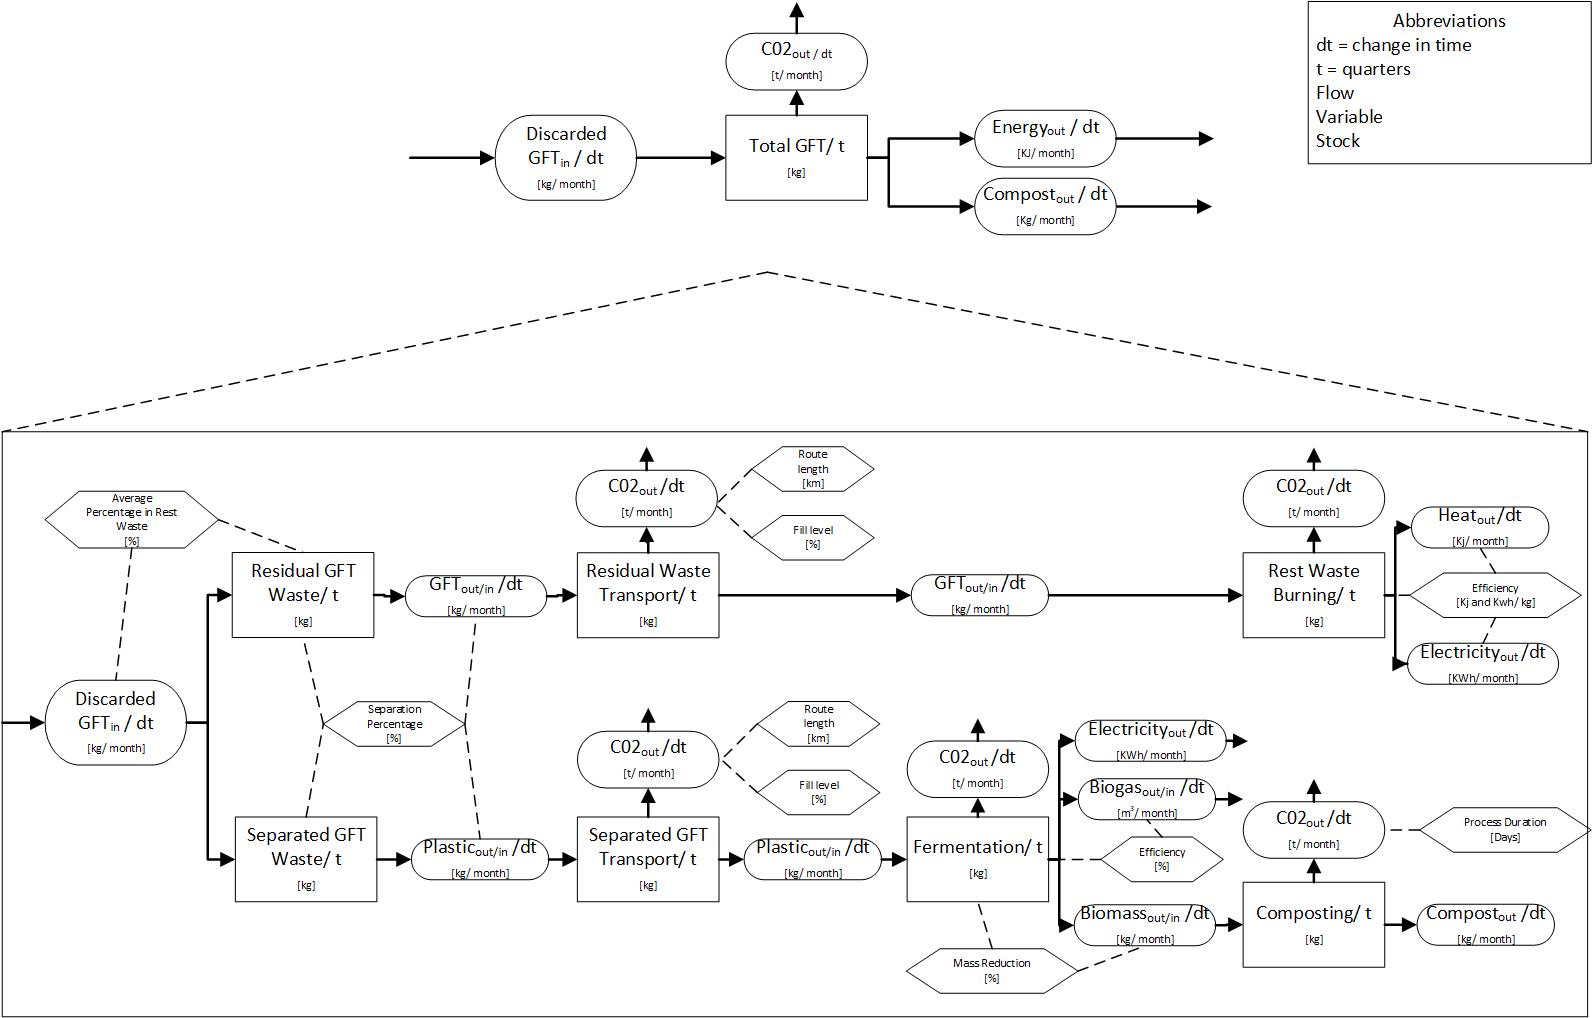

### Discarded GFT

Formulas tbt
Residual wast contains 37% GFT waste 

In [302]:
Discarded_GFT = Separaded_GFT + Non_Separaded * 0.37
Non_Separaded_GFT = Non_Separaded * 0.37


In [253]:
traces = []
Non_GFT_year = Non_Separaded_GFT.sum(axis = 1, skipna = True)
sep = go.Bar(
    x=Non_GFT_year.index,
    y=Non_GFT_year,
    customdata=Non_GFT_year.index,
    hoverinfo='x+y',
    name='non_gft'
)    
traces.append(sep)
Separaded_GFT_year = Separaded_GFT.sum(axis = 1, skipna = True)
non = go.Bar(
    x=Separaded_GFT_year.index,
    y=Separaded_GFT_year,
    customdata=Separaded_GFT_year.index,
    hoverinfo='x+y',
    name='sep_gft'
)
traces.append(non)
layout = dict(
    title= 'GFT - Year',
    xaxis1=dict(
      title='Month'
     ),
    yaxis1=dict(
      title='ton GFT'
     ),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## CO2 Transport

Formula TBT 
Fill level to be determined voor nu 15% 30% energy efficiency 0.258 kg CO 2 per ton en km

In [303]:

## GFT Separaded
for i in range(0,12):
    GFT_Co2_Transport_Sep.iloc[:,i]= wijken_afstand.Afstand_Plastic*((Separaded_GFT.iloc[:,i]) / (10*0.15)) *0.000258

for i in range(0,12):
    GFT_Co2_Transport_Sep_All.iloc[:,i]= wijken_afstand.Afstand_Plastic*((Discarded_GFT.iloc[:,i]) / (10*0.15)) *0.000258


## GFT Nong Separated

for i in range(0,12):
    GFT_Co2_Transport_Non.iloc[:,i] = wijken_afstand.Afstand_Plastic*((Non_Separaded_GFT.iloc[:,i]) / (10*0.15)) *0.000258

for i in range(0,12):
    GFT_Co2_Transport_Non_All.iloc[:,i] = wijken_afstand.Afstand_Plastic*((Discarded_GFT.iloc[:,i]) / (10*0.15)) *0.000258    


## CO2 Fermentation
Formula TBT 
0.114 t CO 2 per ton Afval

In [304]:
GFT_Co2_Fer = Separaded_GFT * 0.114

GFT_Co2_Fer_All = Discarded_GFT * 0.114

## CO2 Inceneration

Formula TBT
3 t CO 2 per ton Afval

In [305]:
GFT_Co2_Inc = Non_Separaded_GFT * 3

GFT_Co2_Inc_All = Discarded_GFT * 3

GFT_Co2_Inc_Viso = GFT_Co2_Inc.sum(axis = 1, skipna = True)

In [148]:

traces = []

trace1 = go.Bar(
    x=GFT_Co2_Inc_Viso.index,
    y=GFT_Co2_Inc_Viso,
    name="Wijk",
    hoverinfo='name',
)
traces.append(trace1)
layout = dict(
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Energy Inceneration

Formula TBT
- 10.1 GJ per t waste
- 26% electricity
- 2% heat
- GJ to kwh = 0.277


In [315]:
GFT_Heat_Inc = Discarded_GFT * 10.1 *0.02*0.277
GFT_Electricity_Inc = Discarded_GFT * 10.1 *0.26*0.277

## Energy Fermentation

Formula TBT 

Electricity production = 154 kwh/ton waste
Heat production = 256 kwh/ton waste 

In [307]:
## Separaded GFT
GFT_Heat_Fer = Separaded_GFT * 0.154
GFT_Electricity_Fer = Separaded_GFT * 0.256

## ALl GFT
GFT_Heat_Fer_ALL = Discarded_GFT * 0.154
GFT_Electricity_Fer_ALL = Discarded_GFT * 0.256

In [308]:
## Generaded Heat and Electricity form GFT

## From Fermentation

GFT_Fer_H = GFT_Heat_Fer_ALL.sum(axis = 1, skipna = True)
GFT_Fer_H  = GFT_Fer_H .sum(axis = 0, skipna = True)
GFT_Fer_E = GFT_Electricity_Fer_ALL.sum(axis = 1, skipna = True)
GFT_Fer_E = GFT_Fer_E.sum(axis = 0, skipna = True) 

## From Incineration

GFT_Inc_H = GFT_Heat_Inc.sum(axis = 1, skipna = True)
GFT_Inc_H  = GFT_Inc_H.sum(axis = 0, skipna = True)
GFT_Inc_E = GFT_Electricity_Inc.sum(axis = 1, skipna = True)
GFT_Inc_E = GFT_Inc_E.sum(axis = 0, skipna = True) 

In [428]:
traces = []

trace = go.Bar(
    x=["GFT_Incineration_Heat","GFT_Incineration_Electricity"],
    y=[GFT_Inc_H,GFT_Inc_E],
    name="Mwh",
    xaxis= 'x1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)



trace1 = go.Bar(
    x=["GFT_Fermentation_Heat","GFT_Fermentation_Electircity"],
    y=[GFT_Fer_H,GFT_Fer_E],
    name="Mwh",
    xaxis= 'x2',
    hoverinfo='name',
)
traces.append(trace1)

layout = dict(
    title= 'Energy Recovery - GFT Suply Chain - Two Scenarios',
    barmode='stack',
     xaxis1=dict(
      domain= [0, 0.5],
      anchor= 'x1', 
      title='Incineration'
     ),
    xaxis2=dict(
      domain= [0.5, 1.0],
      anchor= 'x2', 
      title= 'Fermentation'
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Output GFT Supply Chain

In [309]:
## CO2 Transport Non-Separated gft
Co2_Transport_Non_GFT = GFT_Co2_Transport_Non
Co2_Transport_Non_GFT = Co2_Transport_Non_GFT.sum(axis = 1, skipna = True)
Co2_Transport_Non_GFT = Co2_Transport_Non_GFT.sum(axis = 0, skipna = True)

Co2_Transport_Non_All_GFT = GFT_Co2_Transport_Non_All
Co2_Transport_Non_All_GFT = Co2_Transport_Non_All_GFT.sum(axis = 1, skipna = True)
Co2_Transport_Non_All_GFT = Co2_Transport_Non_All_GFT.sum(axis = 0, skipna = True)

## CO2 inceneration GFT
Co2_Inc_GFT = GFT_Co2_Inc.sum(axis = 1, skipna = True)
Co2_Inc_GFT = Co2_Inc_GFT.sum(axis = 0, skipna = True)

Co2_Inc_All_GFT = GFT_Co2_Inc_All.sum(axis = 1, skipna = True)
Co2_Inc_All_GFT = Co2_Inc_All_GFT.sum(axis = 0, skipna = True)

## Co2 Transport Separated GFT
Co2_Transport_Sep_GFT = GFT_Co2_Transport_Sep.sum(axis = 1, skipna = True)
Co2_Transport_Sep_GFT = Co2_Transport_Sep_GFT.sum(axis = 0, skipna = True)

Co2_Transport_Sep_All_GFT = GFT_Co2_Transport_Sep_All.sum(axis = 1, skipna = True)
Co2_Transport_Sep_All_GFT = Co2_Transport_Sep_All_GFT.sum(axis = 0, skipna = True)

## CO2 Fermentation
Co2_Fer_GFT = GFT_Co2_Fer.sum(axis = 1, skipna = True)
Co2_Fer_GFT = Co2_Fer_GFT.sum(axis = 0, skipna = True)

Co2_Fer_All_GFT  = GFT_Co2_Fer_All.sum(axis = 1, skipna = True)
Co2_Fer_All_GFT  = Co2_Fer_All_GFT.sum(axis = 0, skipna = True)



In [344]:
traces = []

trace = go.Bar(
    x=["Transport Non Separated","Incinteration"],
    y=[Co2_Transport_Non_GFT,Co2_Inc_GFT],
    name="KTon Co2",
    xaxis= 'x1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)




layout = dict(
    title= 'Emissions - GFT Suply Chain ',
    barmode='stack',
     xaxis1=dict(
      domain= [0, 0.5],
      anchor= 'x1', 
      title='Incineration'
     ),
    xaxis2=dict(
      domain= [0.5, 1.0],
      anchor= 'x2', 
      title= 'Fermentation'
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [421]:
traces = []

trace = go.Bar(
    x=["Transport Non Separated","Incineration"],
    y=[Co2_Transport_Non_All_GFT,Co2_Inc_All_GFT],
    name="Ton Co2",
    xaxis= 'x1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)



trace1 = go.Bar(
    x=["Transport All Separated","Fermentation"],
    y=[Co2_Transport_Sep_All_GFT,Co2_Fer_All_GFT],
    name="Ton Co2",
    xaxis= 'x2',
    hoverinfo='name',
)
traces.append(trace1)

layout = dict(
    title= 'Emissions - GFT Suply Chain - Two Scenarios',

    barmode='stack',
     xaxis1=dict(
      domain= [0, 0.5],
      anchor= 'x1', 
      title='Incineration'
     ),
    xaxis2=dict(
      domain= [0.5, 1.0],
      anchor= 'x2', 
      title= 'Fermentation'
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [425]:
Co2_Fer_All_GFT

3289.406632144295

In [311]:
import plotly.plotly as py

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ["Discarded_GFT", "Transport_GFT_Non", "Transport_GFT_separaded", "Fermentation", "Incinertation", "Compost","District Heat","Power Grid","Agriculture","Loss","Athmosphere"],
      color = ["blue"]
    ),
    link = dict(
      source = [0,0,1,2,4,4,3,3,1,4,2,3],
      target = [1,2,4,3,6,7,6,7,10,10,10,10],
      value = [Non_Separaded_GFT.values.sum(),Separaded_GFT.values.sum(),Non_Separaded_GFT.values.sum(),Separaded_GFT.values.sum(),GFT_Inc_H,GFT_Inc_E,GFT_Heat_Fer.values.sum(),GFT_Electricity_Fer.values.sum(),Co2_Transport_Non_GFT,Co2_Inc_GFT,Co2_Transport_Sep_GFT,Co2_Fer_GFT]
  ))

layout =  dict(
    title = "GFT Sankey Diagram",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [426]:
traces = []

trace = go.Bar(
    x=["Heat","Electricity"],
    y=[GFT_Inc_H,GFT_Inc_E],
    name="MwH",
    xaxis= 'x1',
    yaxis= 'y1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)


layout = dict(
    title= 'GFT - Energy and Material Recovery',
    barmode='stack',
    xaxis1=dict(
      domain= [0, 0.66],
      anchor= 'x1', 
      title='Recovered Energy'
     ),
    xaxis2=dict(
      domain= [0.66, 1.0],
      anchor= 'x2', 
      title= 'Recovered Material'
    ),
    yaxis1=dict(
        title='Mwh energy'
    ),
    yaxis2=dict(
        title='Mwh energy',
        overlaying='y2',
        side='right'
    ),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')

C:\Users\vette\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
traces = []

trace = go.Bar(
    x=["Heat","Electricity"],
    y=[GFT_Inc_H,GFT_Inc_E],
    name="MwH",
    xaxis= 'x1',
    yaxis= 'y1',
    hoverinfo='name',
)
traces.append(trace)
layout = dict(
    barmode='stack+group',
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)


layout = dict(
    title= 'GFT - Energy and Material Recovery',
    barmode='stack',
    xaxis1=dict(
      domain= [0, 0.66],
      anchor= 'x1', 
      title='Recovered Energy'
     ),
    xaxis2=dict(
      domain= [0.66, 1.0],
      anchor= 'x2', 
      title= 'Recovered Material'
    ),
    yaxis1=dict(
        title='Mwh energy'
    ),
    yaxis2=dict(
        title='Mwh energy',
        overlaying='y2',
        side='right'
    ),
    legend=dict(
        y=0.5,
        traceorder='reversed',
        font=dict(
            size=16
        )
    )
)
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='grouped-bar')